In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNB'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_26003/1468681165.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# Librairie où importer les données
import yfinance as yf
_ = yf.Ticker("^FCHI")
ts_data = _.history("max")
ts_data.index = ts_data.index.strftime('%Y-%m-%d')
ts_data.columns

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [3]:
import warnings
warnings.filterwarnings('ignore')
ts_data = ts_data[[ 'Close']]
import pandas as pd
import numpy as np


ts_data['Return'] = ts_data["Close"].pct_change()
ts_data = ts_data.dropna(subset=['Return'])
print(ts_data.head())

             Close    Return
Date                        
1990-03-02  1860.0  0.015284
1990-03-05  1874.0  0.007527
1990-03-06  1872.0 -0.001067
1990-03-07  1880.0  0.004274
1990-03-08  1917.0  0.019681


<Figure size 576x384 with 0 Axes>

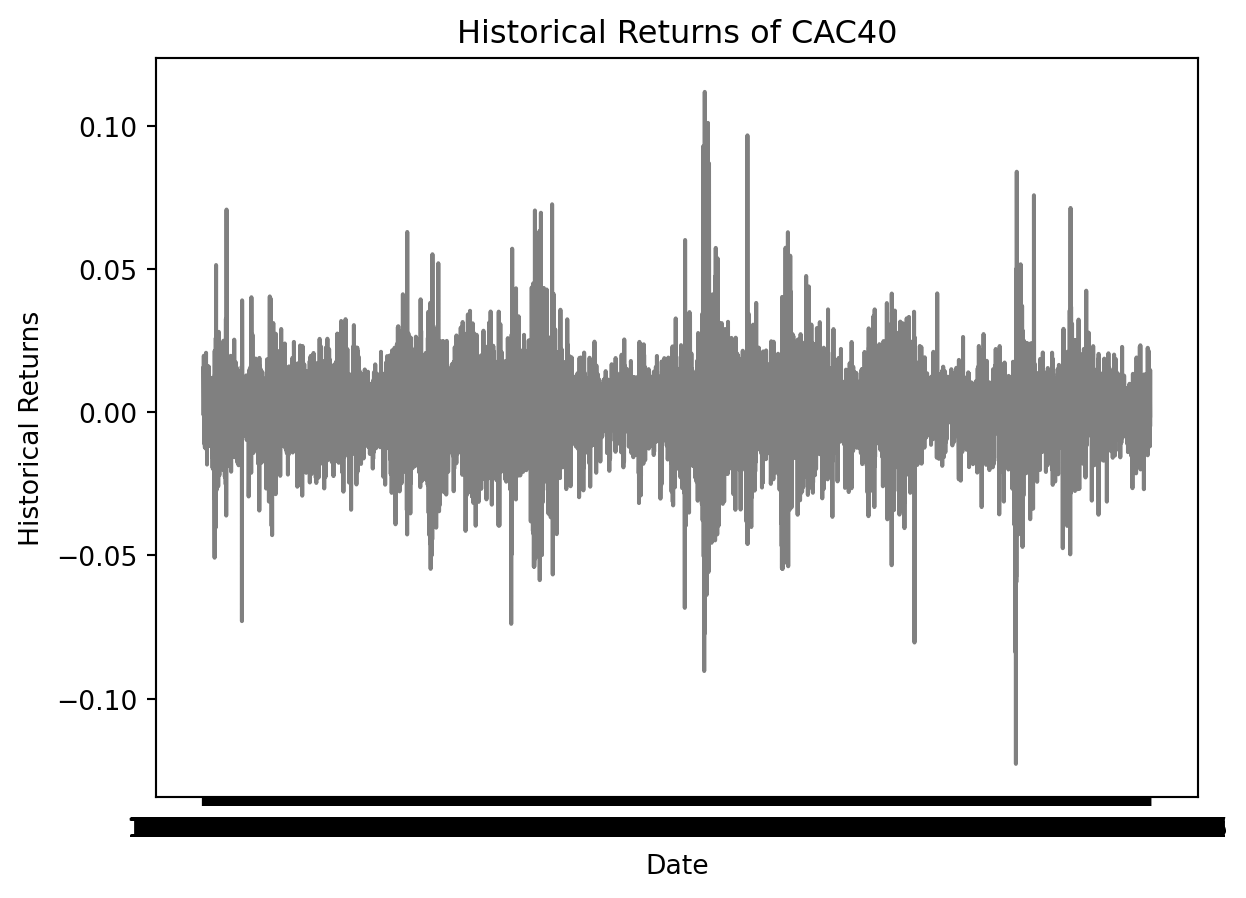

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

fig, ax = plt.subplots(1)

ax.set_xlabel('Date')
ax.set_ylabel('Historical Returns')
ax.plot(ts_data.index, ts_data['Return'], color='grey')
ax.tick_params(axis='y')

plt.title('Historical Returns of CAC40')
plt.show()

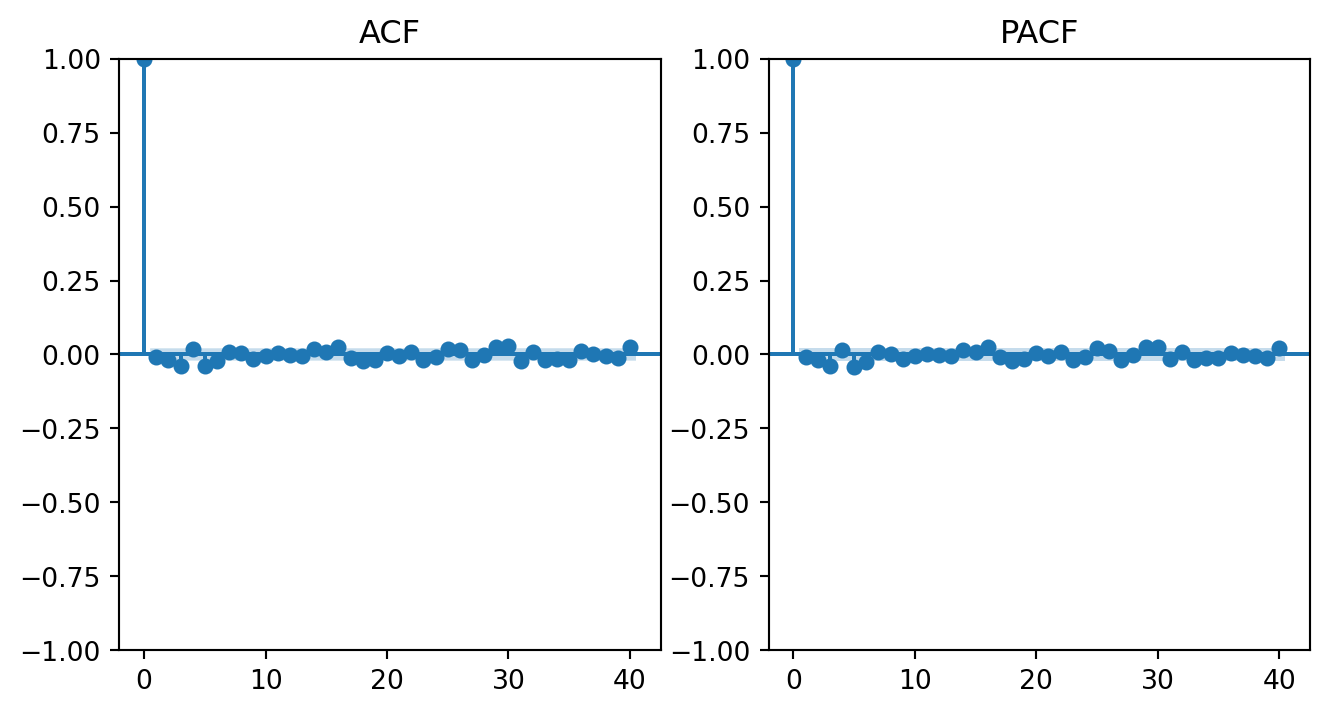

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(8, 4))
plot_acf(ts_data['Return'].dropna(), ax=ax[0],title='ACF')
plot_pacf(ts_data['Return'].dropna(), ax=ax[1],title='PACF')
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts_data['Return'].dropna(), regression='c')
print(f"ADF Statistic: {round(adf_result[0],2)} and p-value: {adf_result[1]}")

ADF Statistic: -41.45 and p-value: 0.0


In [7]:
train_size = int(len(ts_data)*0.75)
test_size = len(ts_data)-train_size

train_close = ts_data.iloc[0:train_size,:].dropna()
test_close = ts_data.iloc[train_size:len(ts_data),:]
print("Taille de l'ensemble d'apprentissage :", len(train_close))
print("Taille de l'ensemble de test :", len(test_close))

Taille de l'ensemble d'apprentissage : 6654
Taille de l'ensemble de test : 2218


In [8]:
from scipy import stats
stats.shapiro(train_close["Return"]).pvalue

np.float64(1.0859354571271105e-40)

Text(0.5, 1.0, 'QQ-plot')

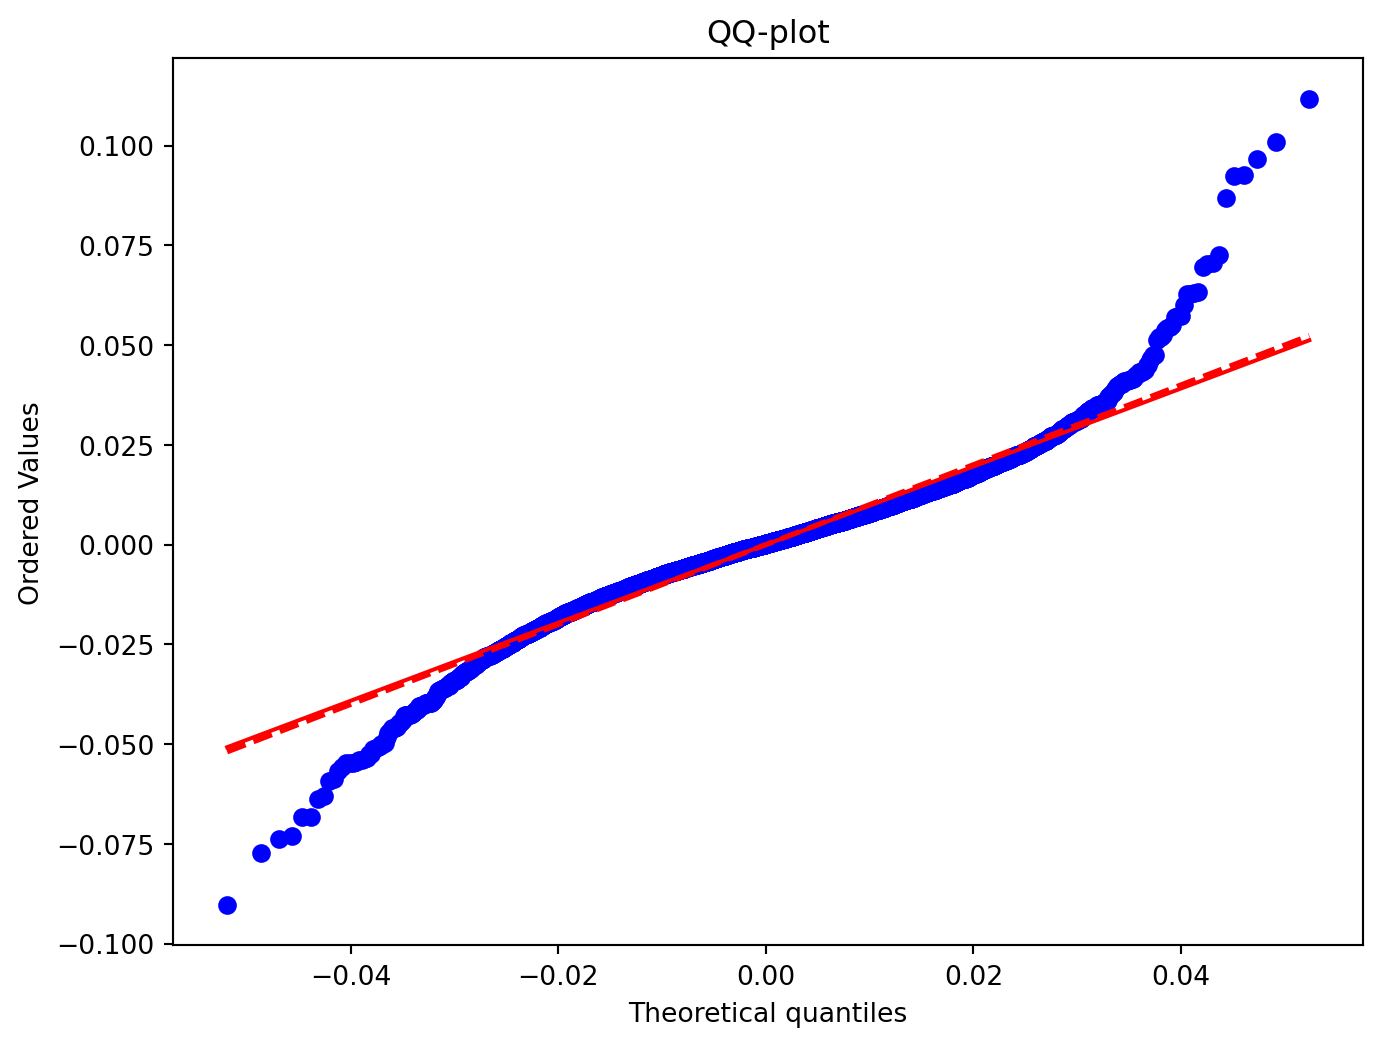

In [9]:
## Analyse graphique avec le QQ-plot
plt.figure(figsize=(8, 6))
probplot = stats.probplot(train_close["Return"], 
                        sparams = (np.mean(train_close["Return"]), np.std(train_close["Return"])), 
                        dist='norm', plot=plt)
plt.plot(probplot[0][0], probplot[0][0], color='red', linestyle='dashed', linewidth=2, label='Première bissectrice')
plt.title('QQ-plot')

In [10]:
from scipy import stats
def gaussian_var(PnL, seuil):
    mean_PnL = np.mean(PnL)
    sd_PnL = np.std(PnL)
    VaR = - mean_PnL + sd_PnL * stats.norm.ppf(seuil)
    return VaR

seuil = 0.99
VaR_gaussienne = gaussian_var(train_close["Return"], seuil)

print(f"La VaR à horizon 1 jour est de {round(VaR_gaussienne, 4)}")

La VaR à horizon 1 jour est de 0.0325


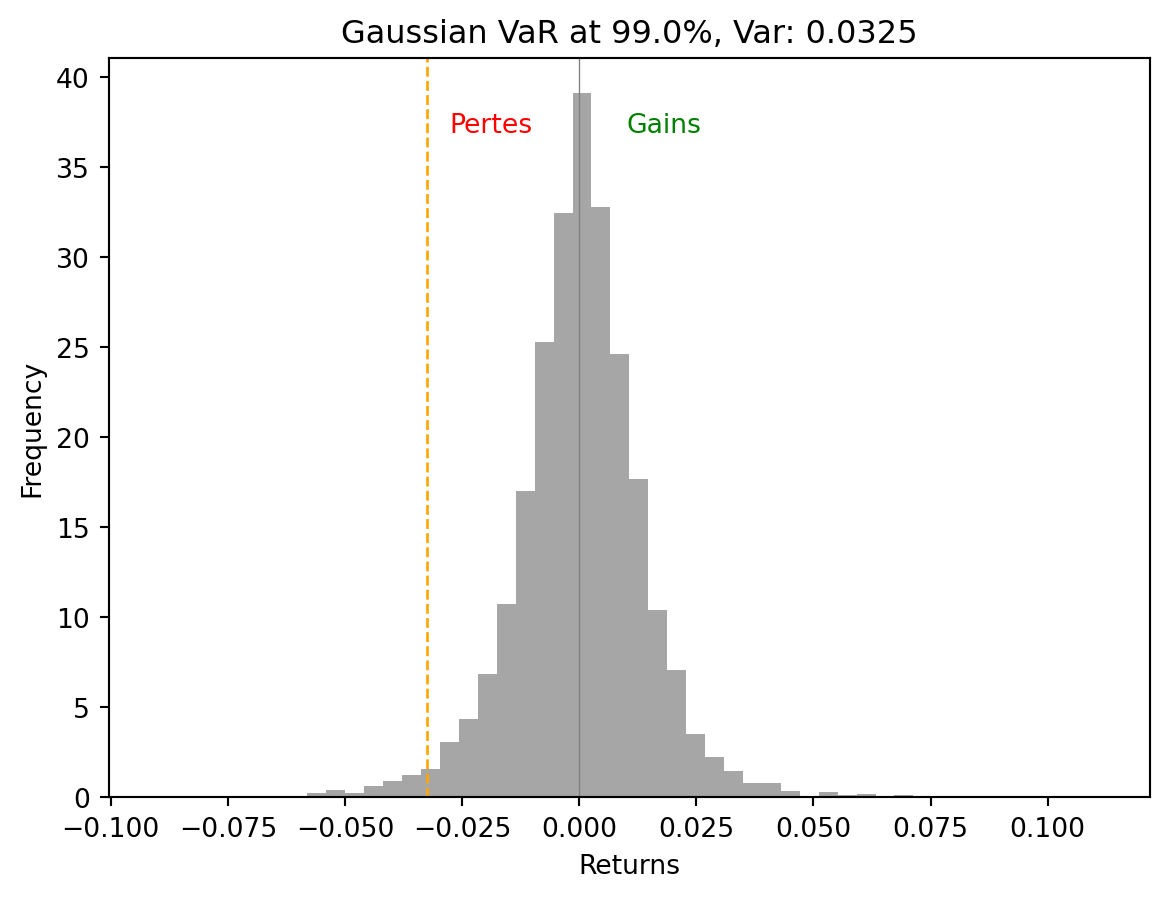

In [11]:
# Plot histogram of returns
plt.hist(train_close["Return"], bins=50, density=True, alpha=0.7,color="grey")

# Plot VaR line
plt.axvline(x=-VaR_gaussienne, color="orange", linestyle="--", linewidth=1)
plt.axvline(x=0, color="grey",  linewidth=0.5)

# Add text for Loss and Gain
plt.text(-0.01, plt.ylim()[1] * 0.9, 'Pertes', horizontalalignment='right', color='red')
plt.text(0.01, plt.ylim()[1] * 0.9, 'Gains', horizontalalignment='left', color='green')


# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Gaussian VaR at {seuil * 100}%, Var: {VaR_gaussienne:.4f}")

# Show the plot
plt.show()

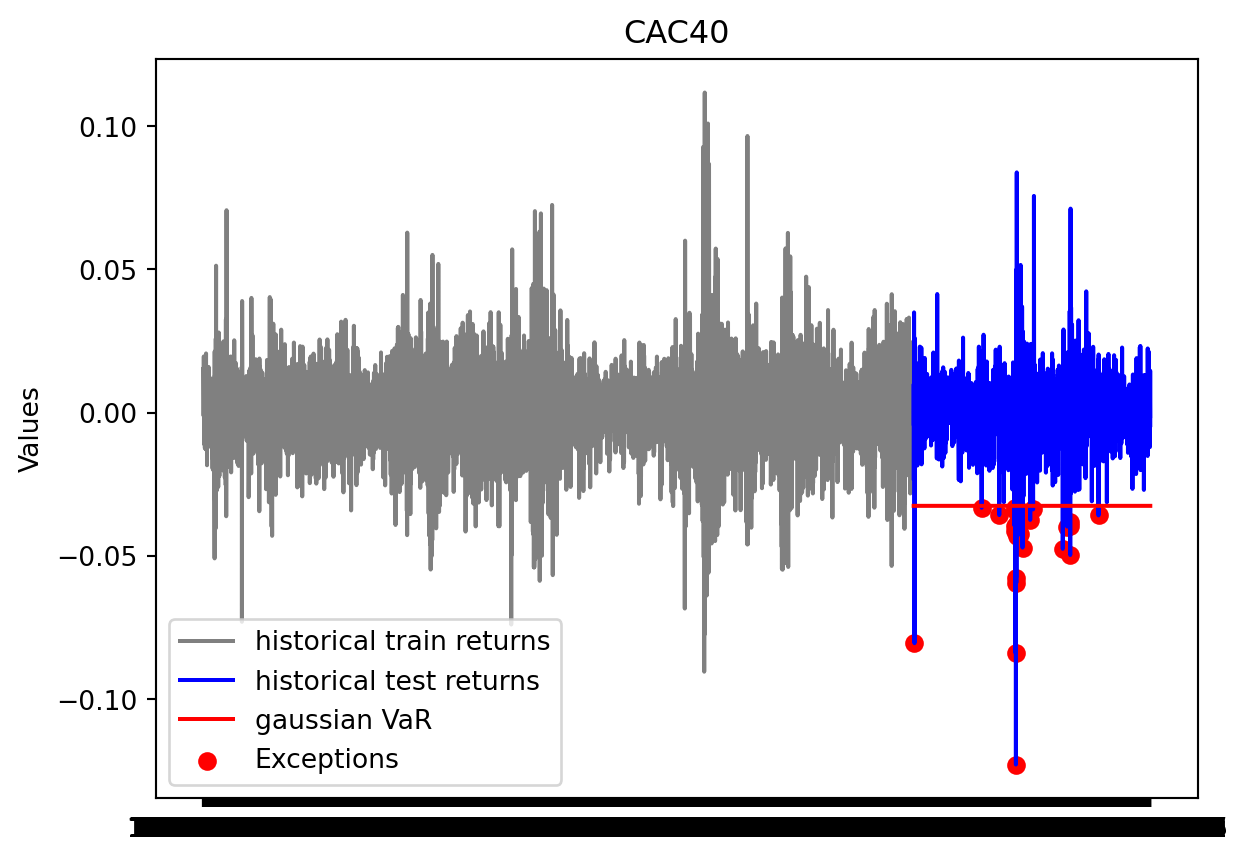

In [12]:
plt.plot(ts_data.index[0:train_size], train_close['Return'], label="historical train returns", color = 'gray')
plt.plot(ts_data.index[train_size:], test_close['Return'], label="historical test returns", color = 'blue')
plt.plot(ts_data.index[train_size:], [-VaR_gaussienne for i in range(test_size)], label="gaussian VaR", color = 'red')
list_exceptions_gaus = [i for i in range(len(test_close['Return'])) if test_close['Return'][i]<-VaR_gaussienne]
plt.scatter(test_close.index[list_exceptions_gaus], test_close['Return'][list_exceptions_gaus], color='red', label='Exceptions')
plt.title('CAC40')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()

In [13]:
round((len(list_exceptions_gaus)/test_size)*100,2) 

1.17

In [14]:
def ptest(p0,n,k) :
  variance=p0*(1-p0)/n
  p=(k/n)
  t=(p-p0)/np.sqrt(variance)

  pvaleur=1-stats.norm.cdf(t)
  return pvaleur

ptest(0.01,test_size,len(list_exceptions_gaus))

np.float64(0.20747847649723705)

In [15]:
def historical_var(PnL, seuil):
    return -np.percentile(PnL, (1 - seuil) * 100)

VaR_historique = historical_var(train_close["Return"],seuil)
print(f"La VaR historique à horizon 1 jour est de {round(VaR_historique, 4)}")

La VaR historique à horizon 1 jour est de 0.0396


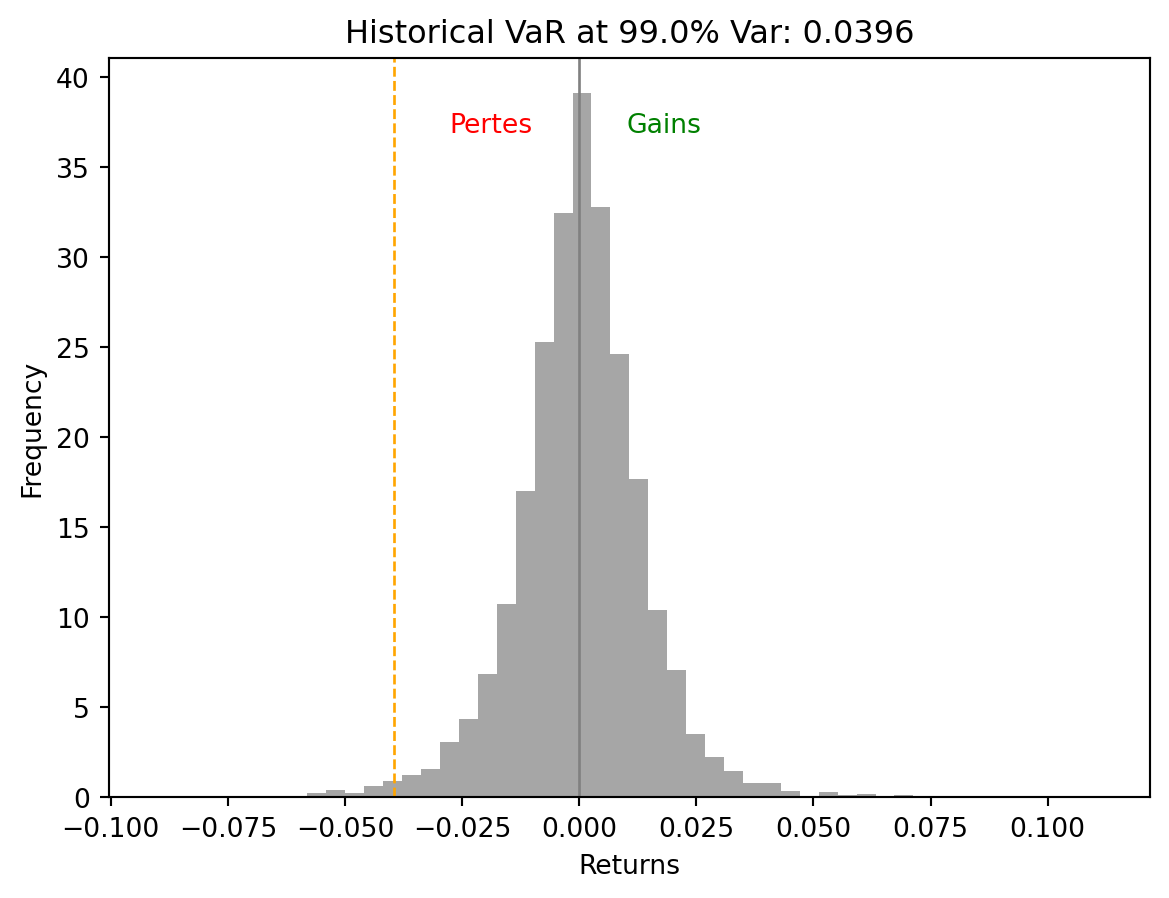

In [16]:
# Plot histogram of returns
plt.hist(train_close["Return"], bins=50, density=True, alpha=0.7,color="grey")

# Plot VaR line
plt.axvline(x=-VaR_historique, color="orange", linestyle="--", linewidth=1)
plt.axvline(x=0, color="grey",  linewidth=1)
# Add text for Loss and Gain
plt.text(- 0.01, plt.ylim()[1] * 0.9, 'Pertes', horizontalalignment='right', color='red')
plt.text(0.01, plt.ylim()[1] * 0.9, 'Gains', horizontalalignment='left', color='green')


# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Historical VaR at {seuil * 100}% Var: {VaR_historique:.4f}")

# Show the plot
plt.show()

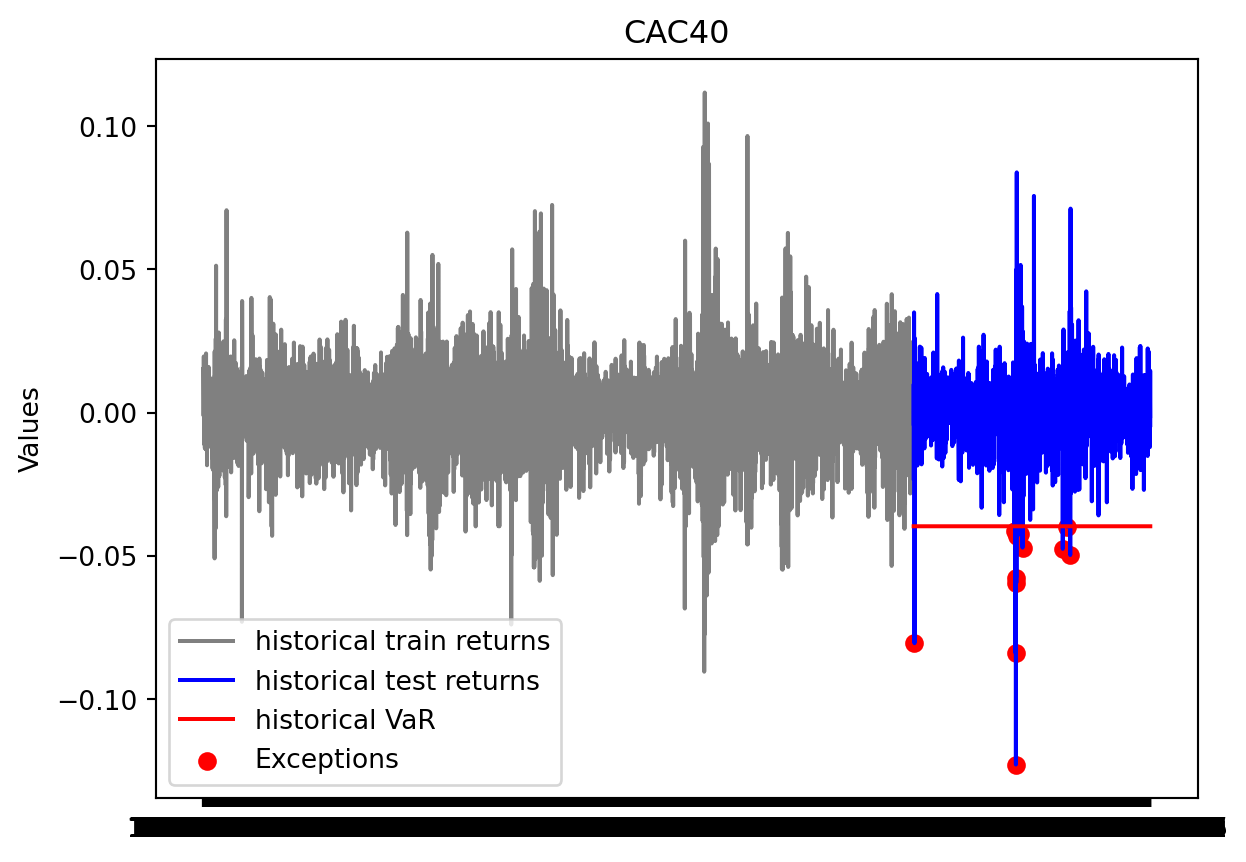

In [17]:
import matplotlib.pyplot as plt
plt.plot(ts_data.index[0:train_size], train_close['Return'], label="historical train returns", color = 'gray')
plt.plot(ts_data.index[train_size:], test_close['Return'], label="historical test returns", color = 'blue')
plt.plot(ts_data.index[train_size:], [-VaR_historique for i in range(test_size)], label="historical VaR", color = 'red')
list_exceptions_hist = [i for i in range(len(test_close['Return'])) if test_close['Return'][i]<-VaR_historique]
plt.scatter(test_close.index[list_exceptions_hist], test_close['Return'][list_exceptions_hist], color='red', label='Exceptions')
plt.title('CAC40')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()

In [18]:
round((len(list_exceptions_hist)/test_size)*100,2) 
ptest(0.01,test_size,len(list_exceptions_hist))

np.float64(0.9749462153394883)

In [19]:
VaR_results = []

num_simulations_list = range(10, 10000 + 1, 1)
mean=train_close["Return"].mean()
std = train_close["Return"].std()

for num_simulations in num_simulations_list:
  # Generate random scenarios of future returns
  simulated_returns = np.random.normal(mean, std, size= num_simulations)

  # Calculate portfolio values for each scenario
  portfolio_values = (train_close["Close"].iloc[-1] * (1 + simulated_returns))

  # Convert portfolio_values into a DataFrame
  portfolio_values = pd.DataFrame(portfolio_values)

  # Calculate portfolio returns for each scenario
  portfolio_returns = portfolio_values.pct_change()
  portfolio_returns=portfolio_returns.dropna()
  portfolio_returns=portfolio_returns.mean(axis=1)


  # Calculate VaR
  if portfolio_returns.iloc[-1] != 0:
      VaR_monte_carlo =  historical_var(portfolio_returns,seuil)
  else:
      VaR_monte_carlo = 0
  
  VaR_results.append(VaR_monte_carlo)

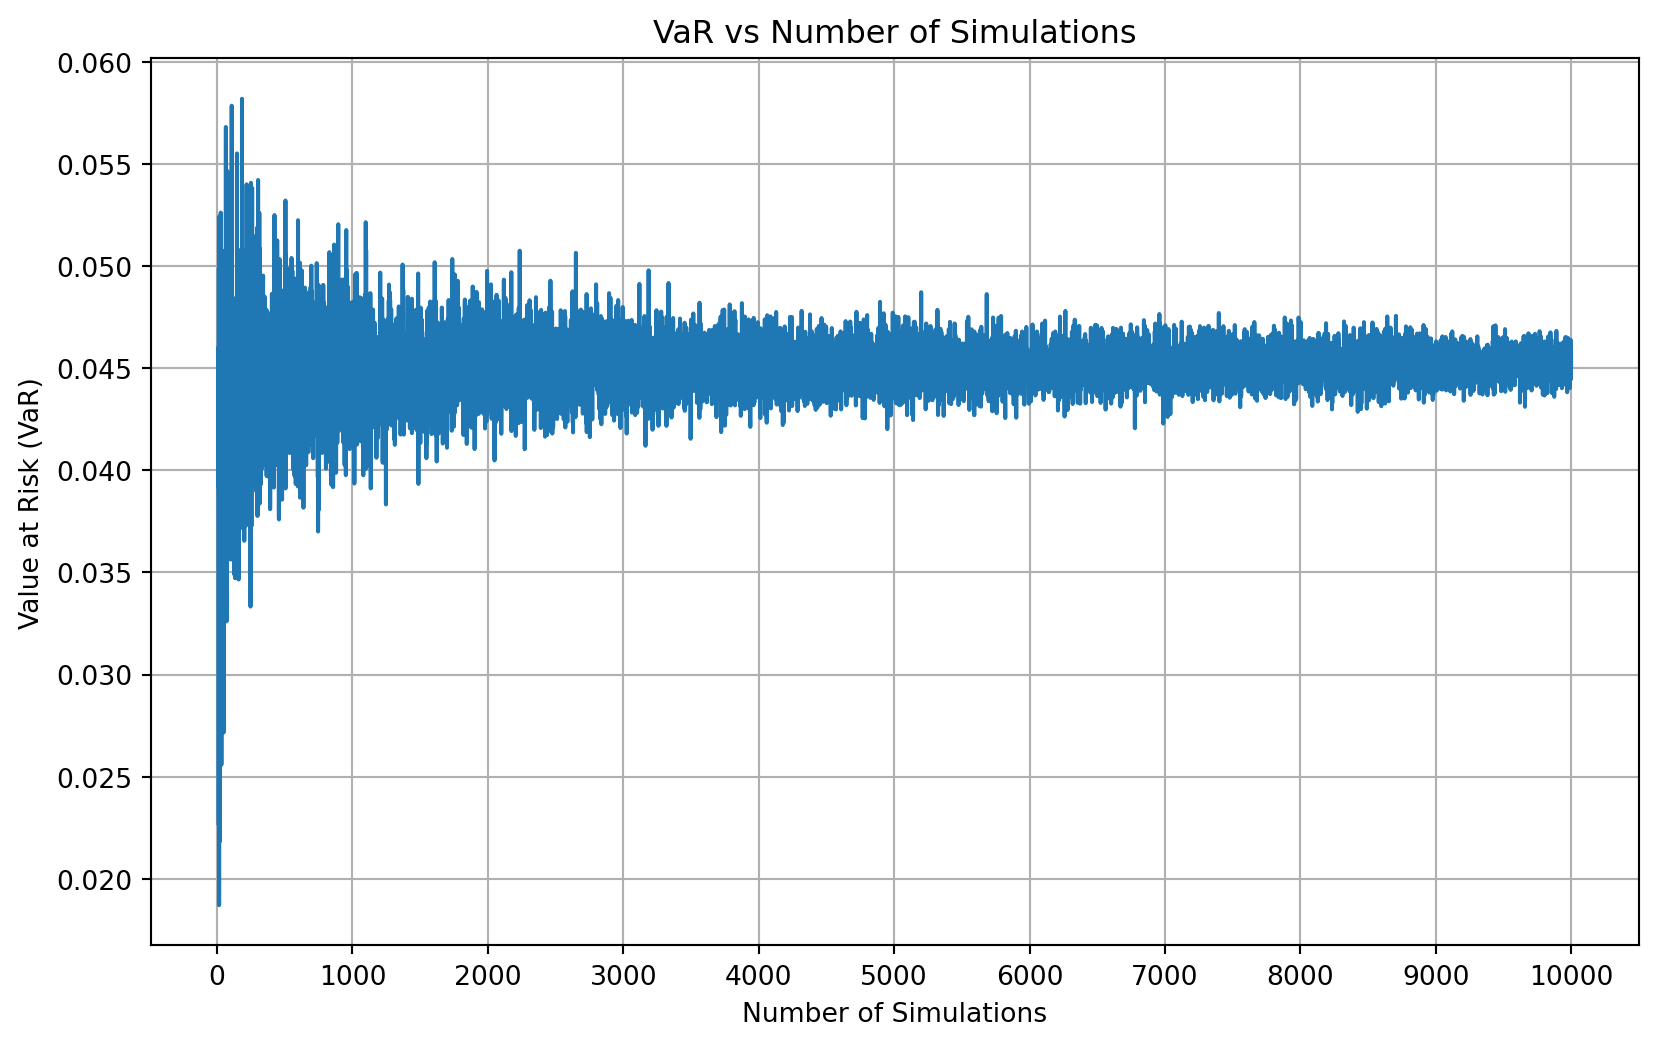

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.xticks(np.arange(0,10000 + 1, 1000))
plt.plot(num_simulations_list, VaR_results, linestyle='-')
plt.xlabel('Number of Simulations')
plt.ylabel('Value at Risk (VaR)')
plt.title('VaR vs Number of Simulations')
plt.grid(True)
plt.show()
# Customize x-axis ticks

In [21]:
num_simulations = 3000

# Generate random scenarios of future returns
simulated_returns = np.random.normal(mean, std, size= num_simulations)

# Calculate portfolio values for each scenario
portfolio_values = (train_close["Close"].iloc[-1] * (1 + simulated_returns))

# Convert portfolio_values into a DataFrame
portfolio_values = pd.DataFrame(portfolio_values)

# Calculate portfolio returns for each scenario
portfolio_returns = portfolio_values.pct_change()
portfolio_returns=portfolio_returns.dropna()
portfolio_returns=portfolio_returns.mean(axis=1)


# Calculate VaR
if portfolio_returns.iloc[-1] != 0:
    VaR_monte_carlo =  historical_var(portfolio_returns,seuil)
else:
    VaR_monte_carlo = 0

VaR_monte_carlo

np.float64(0.044480943050017555)

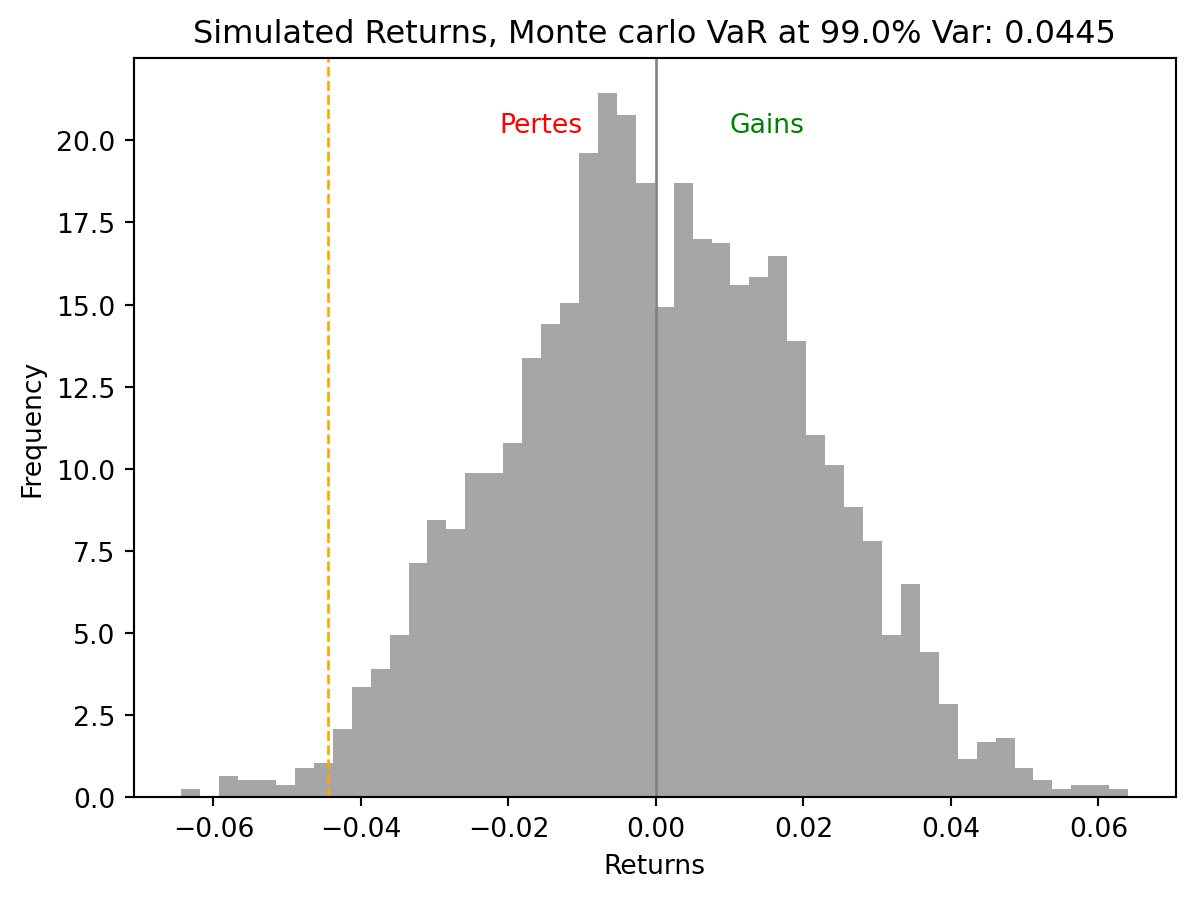

In [22]:
# Plot histogram of returns
plt.hist(portfolio_returns, bins=50, density=True, alpha=0.7,color="grey")

# Plot VaR line
plt.axvline(x=-VaR_monte_carlo, color="orange", linestyle="--", linewidth=1)
plt.axvline(x=0, color="grey",  linewidth=1)
# Add text for Loss and Gain
plt.text(- 0.01, plt.ylim()[1] * 0.9, 'Pertes', horizontalalignment='right', color='red')
plt.text(0.01, plt.ylim()[1] * 0.9, 'Gains', horizontalalignment='left', color='green')


# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Simulated Returns, Monte carlo VaR at {seuil * 100}% Var: {VaR_monte_carlo:.4f}")

# Show the plot
plt.show()

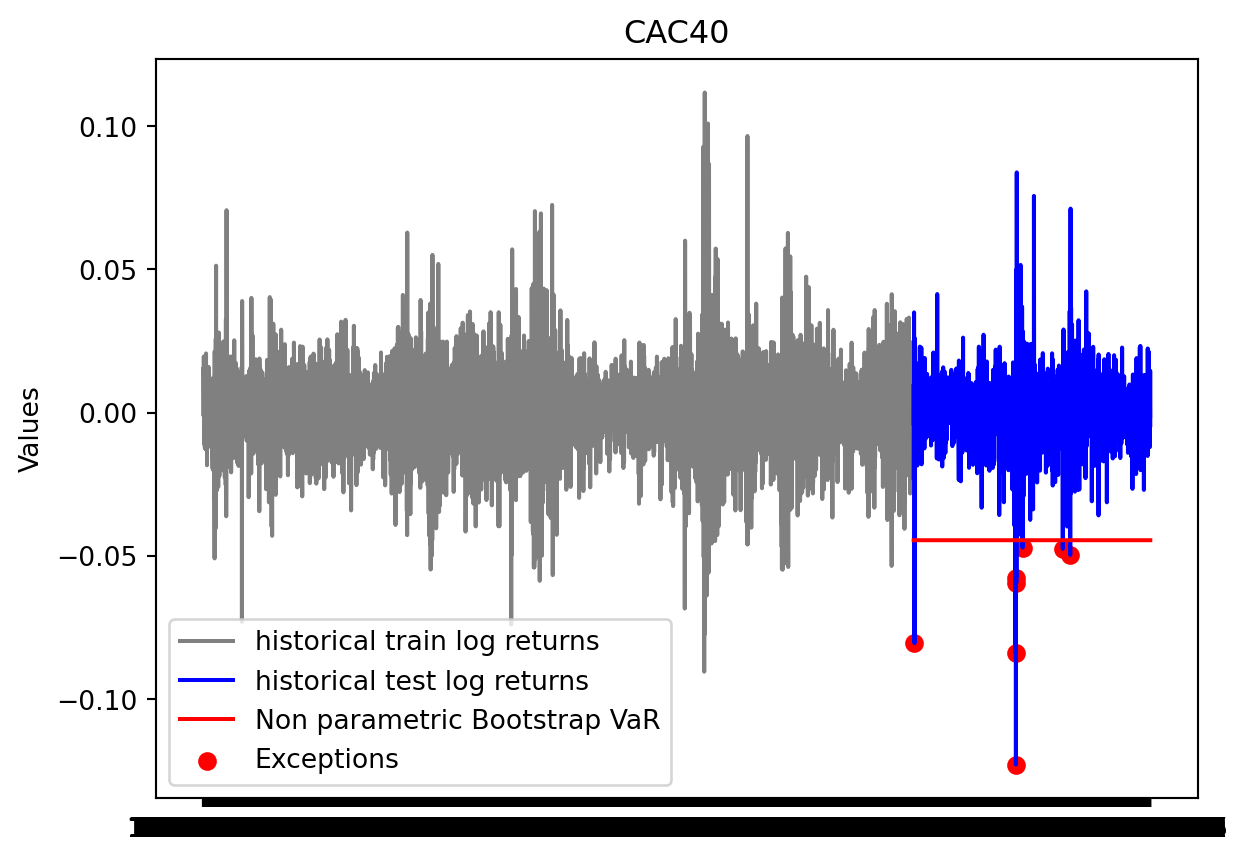

In [23]:
plt.plot(ts_data.index[0:train_size], train_close['Return'], label="historical train log returns", color = 'gray')
plt.plot(ts_data.index[train_size:], test_close['Return'], label="historical test log returns", color = 'blue')
plt.plot(ts_data.index[train_size:], [-VaR_monte_carlo for i in range(test_size)], label="Non parametric Bootstrap VaR", color = 'red')
list_exceptions_np_boot = [i for i in range(len(test_close['Return'])) if test_close['Return'][i]<-VaR_monte_carlo]
plt.scatter(test_close.index[list_exceptions_np_boot], test_close['Return'][list_exceptions_np_boot], color='red', label='Exceptions')
plt.title('CAC40')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()

In [24]:
round((len(list_exceptions_np_boot)/test_size)*100,2) 
ptest(0.01,test_size,len(list_exceptions_np_boot))

np.float64(0.9987611936960696)

In [25]:
# Print the VaR values
print(f"Parametric VaR: {VaR_gaussienne:.2%}, Pvalue du backtesting: {ptest(0.01, test_size, len(list_exceptions_gaus)):.4f}")
print(f"Historical VaR: {VaR_historique:.2%}, Pvalue du backtesting: {ptest(0.01, test_size, len(list_exceptions_hist)):.4f}")
print(f"Monte Carlo VaR: {VaR_monte_carlo:.2%}, Pvalue du backtesting: {ptest(0.01, test_size, len(list_exceptions_np_boot)):.4f}")

Parametric VaR: 3.25%, Pvalue du backtesting: 0.2075
Historical VaR: 3.96%, Pvalue du backtesting: 0.9749
Monte Carlo VaR: 4.45%, Pvalue du backtesting: 0.9988
